# P&G Python Linear Regression Model:  the marketing channel that has the greatest impact on sales

### Data set Description

Assume that a P&G marketing director in charge of media placement, event promotion wants to find the channel that has the greatest impact on sales among the marketing channels currently in use.Therefore, in the case of limited resources, it can be targeted delivery for the business, so that sales to achieve greater growth.

The aim of the case study is to find the relationship between revenue and maketing channel investment in a linear regression form.

The goal is to get equation which is similar to this:

**y = intercept + coef1\*x1 + coef2\*x2......**

### Terminology Understanding

[MAE](https://www.statisticshowto.com/absolute-error/)\
[RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)\
[OLS](https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols)

### Import library and data

In [1]:
import pandas as pd
store = pd.read_csv('../input/store-data/Store.csv')

### Understand the dataframe
* Dataframe info
* Data cleaning and manipulation 
* Basic statistics

In [2]:
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  985 non-null    int64  
 1   revenue     985 non-null    float64
 2   reach       985 non-null    int64  
 3   local_tv    929 non-null    float64
 4   online      985 non-null    int64  
 5   instore     985 non-null    int64  
 6   person      985 non-null    int64  
 7   event       985 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 61.7+ KB


,Unnamed: 0,revenue,reach,local_tv,online,instore,person,event
0,845,45860.28,2,31694.91,2115,3296,8,non_event
1,483,63588.23,2,35040.17,1826,2501,14,special
2,513,23272.69,4,30992.82,1851,2524,6,special
3,599,45911.23,2,29417.78,2437,3049,12,special
4,120,36644.23,2,35611.11,1122,1142,13,cobranding


**Some variables description**

**reach:** tweet times (Wechat tweet or Twitter)\
**local_tv:** local TV advertising investment\
**online:** online advertising investment\
**instore:** in stores investment, for example posters and displays\
**person:** store sales staff input\
**event:** promotional events

From the results above, I found that the column 'local_tv' included some missing values, so I considered using the 'local_tv' mean values to fill the null. Another thing I noticed was column'Unnamed: 0' wasn't needed, so I planned to delete the column. 

First, I want to check how many null values take place in each column.

In [3]:
store.isnull().sum()

Unnamed: 0     0
revenue        0
reach          0
local_tv      56
online         0
instore        0
person         0
event          0
dtype: int64

The result shows there are 5 null values in 'local_tv' column. Now, I start to fill the null values.

In [4]:
store['local_tv'] = store['local_tv'].fillna(store['local_tv'].mean())

Also, it is needed to check if I successfully conducted the step above.

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  985 non-null    int64  
 1   revenue     985 non-null    float64
 2   reach       985 non-null    int64  
 3   local_tv    985 non-null    float64
 4   online      985 non-null    int64  
 5   instore     985 non-null    int64  
 6   person      985 non-null    int64  
 7   event       985 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 61.7+ KB


Now it's time to delete column 'Unnamed: 0'.

In [6]:
store = store.drop('Unnamed: 0', axis = 1)

Similiarly, I am going to check if the "drop" was successful.

In [7]:
store.head()

,revenue,reach,local_tv,online,instore,person,event
0,45860.28,2,31694.91,2115,3296,8,non_event
1,63588.23,2,35040.17,1826,2501,14,special
2,23272.69,4,30992.82,1851,2524,6,special
3,45911.23,2,29417.78,2437,3049,12,special
4,36644.23,2,35611.11,1122,1142,13,cobranding


Now I have finished all the data cleaning. It's time to do some statistics using describe(). First, I will apply the describe() to the whole dataframe.

In [8]:
store.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3856.285575,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28954.530000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31324.061109,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33782.890000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


At this stage, I can point out some important information:

Only the column 'event' is categorical column. I will need to convert it to dummy vaiable later.


Now, I will check what are the unique values in 'event' column.

In [9]:
store.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

I am also interested in the renenue under these four types of event.

In [10]:
store.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081563,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


From the result above, I noticed:

* special event earned the most revenue averagely
* cobranding is the most fequent event

Time to convert 'event' to dummy variable.

In [11]:
store = pd.get_dummies(store)

Let's take a look at how the dataframe is changed now.

In [12]:
store.head(10)

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,45860.28,2,31694.91,2115,3296,8,0,0,1,0
1,63588.23,2,35040.17,1826,2501,14,0,0,0,1
2,23272.69,4,30992.82,1851,2524,6,0,0,0,1
3,45911.23,2,29417.78,2437,3049,12,0,0,0,1
4,36644.23,2,35611.11,1122,1142,13,1,0,0,0
5,36172.81,4,22372.59,2001,1881,17,1,0,0,0
6,43797.03,3,31443.74,1667,1846,15,1,0,0,0
7,41629.80,4,35775.75,1155,2715,12,0,0,0,1
8,21303.48,2,24888.31,1853,3677,4,0,0,1,0
9,20746.15,4,26623.48,1497,3075,9,0,1,0,0


All 4 event sub-types have become 4 new vaiables, and '1' represents 'yes', '0'represent 'no'. Can also take a look at info(), will see the data type is changed from object to uint8.

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           985 non-null    float64
 1   reach             985 non-null    int64  
 2   local_tv          985 non-null    float64
 3   online            985 non-null    int64  
 4   instore           985 non-null    int64  
 5   person            985 non-null    int64  
 6   event_cobranding  985 non-null    uint8  
 7   event_holiday     985 non-null    uint8  
 8   event_non_event   985 non-null    uint8  
 9   event_special     985 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 50.1 KB


### Correlation and Visualisation

Now, the dataframe is completed, it's time to do some correlation!

In [14]:
store.corr()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.588349,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.033206,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.588349,-0.033206,1.000000,0.006666,-0.045598,0.047622,0.020289,-0.038305,0.011029,-0.005702
online,0.171227,-0.025141,0.006666,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.045598,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.047622,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020289,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.038305,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011029,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005702,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In order to see a clear correlation amang revenue and all the other vaiables, I will use the following code:

In [15]:
store.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
local_tv,0.588349
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


Now, it is clear that local_tv,person,instore are mostly correlated to revenue.

It will be helpful to see some trend using regression plot here.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='local_tv', ylabel='revenue'>

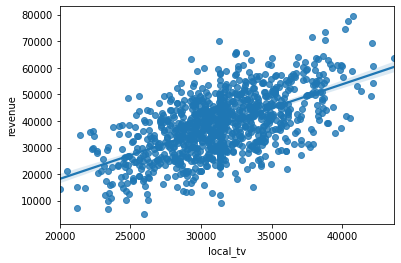

In [17]:
sns.regplot(x = 'local_tv', y = 'revenue', data = store)

<AxesSubplot:xlabel='person', ylabel='revenue'>

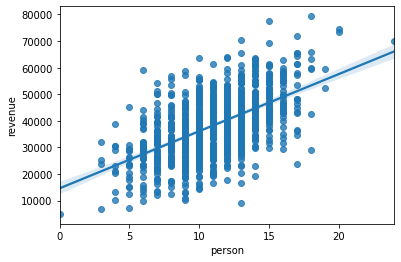

In [18]:
sns.regplot(x = 'person', y = 'revenue', data = store)

<AxesSubplot:xlabel='instore', ylabel='revenue'>

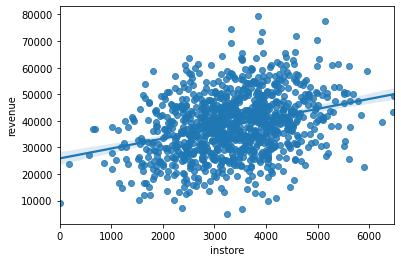

In [19]:
sns.regplot(x = 'instore', y = 'revenue', data = store)

From the regression plot above, we can take a overall look at how each point distributed and how closely it is to the linear regression. While there are many outliers, but overall the points focus on the center. 

### Linear Regression modeling

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Build model
model=LinearRegression()

In [22]:
# Create independent variable x and denpendent variable y.
x = store[['local_tv','person','instore']]
y = store['revenue']

In [23]:
# Model fitting
model.fit(x,y)

LinearRegression()

In [24]:
# Model intercept
model.intercept_

-52881.12439059004

In [25]:
# Model independent variables coefficients
model.coef_

array([1.75153812e+00, 2.05057495e+03, 4.09032709e+00])

### Model Evaluation and Improve

In [26]:
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y

rmse=(error**2).mean()**.5
mae=abs(error).mean()

print(rmse)
print(mae)

5884.181391972568
4717.89476648171


I have already produced all needed parameters for the model. To be able to get the best model as we can, here I propose to do an extra thing - improve the model. How can we improve the model? The only thing we will need to do is to change some information, it could be:

* when I was filling all null values, I used mean values, and now I could change the mean values to median values and see if MAE and RMSE are going to decrease.
* another way is add a new variable to x.

That's the basic idea, but I will not include the process here as it is just repeating work. The point is understand the core concept. However I am going to use another method to produce a linear regression model, here I'm using OLS.

In [27]:
from statsmodels.formula.api import ols

In [28]:
# This step is similar to linear regression model
x=store[['local_tv','person','instore']]  
y=store['revenue'] 

In [29]:
model=ols('y~x',store).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     959.2
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          4.09e-291
Time:                        10:17:31   Log-Likelihood:                -9947.5
No. Observations:                 985   AIC:                         1.990e+04
Df Residuals:                     981   BIC:                         1.992e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.288e+04   1804.489    -29.305      0.0

Very straightforward, and you can see the output intercept and coefficients are same as the linear regression model. Plus, you get more other parameters to help you understand the model. For example R-squared, AIC, BIC and other important tests.

### Model and Business Interpretation

Now, I am going to produce the final equation.

revenue = -52880 + 1.75*local_tv + 2050*person + 4.09*instore

**The following conclusions can be drawn:**

* Every 1 £ increase in TV advertising investment, you can get 1.75 £ of revenue in return.
* The revenue return of 4.09 £ can be realized for every 1 £ increase in in-store poster investment.
* Every 1 sale staff increased, you can get 2050 £ of revenue in return.
* Constant collection of data and the addition of new variables can improve the control of the overall marketing resource input.